# **Code for Resynchronization Paper**

Code for First Three Graph utlizing solve_ivp library from scipy.integrate

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [4]:
def reduced_dynamics(t, z, K, F, Delta, Omega):
    """
    Governs the dynamics of the order parameter z:
    dz/dt = (1/2) * [(Kz + F) - z^2 * conj(Kz + F)] - (Delta + i*Omega)*z
    """
    z_conj = np.conjugate(z)
    dzdt = 0.5 * ((K * z + F) - z**2 * (K * z + F).conjugate()) - (Delta + 1j* Omega) * z
    return dzdt

In [7]:
def solve_reduced_dynamics(K, F, Delta, Omega, z0, t_span, t_eval):
    """
    Solves the reduced dynamics for z using solve_ivp.
    """
    sol = solve_ivp(
        lambda t, z: reduced_dynamics(t, z[0], K, F, Delta, Omega),
        t_span, [z0],
        t_eval=t_eval #points at which data is stored
    )
    return sol

# **Figure 1**

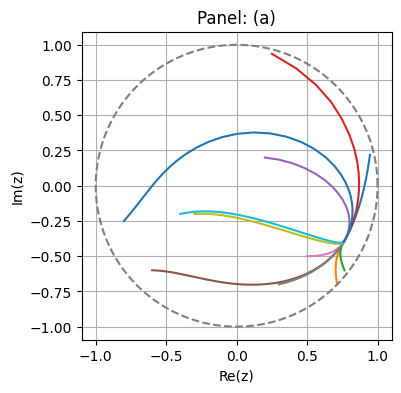

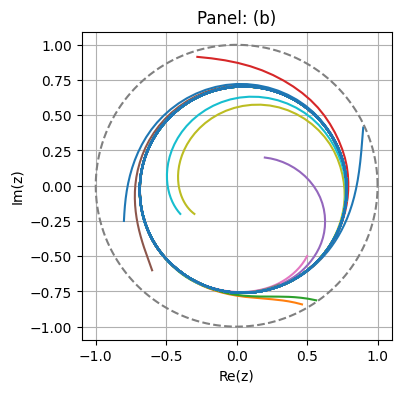

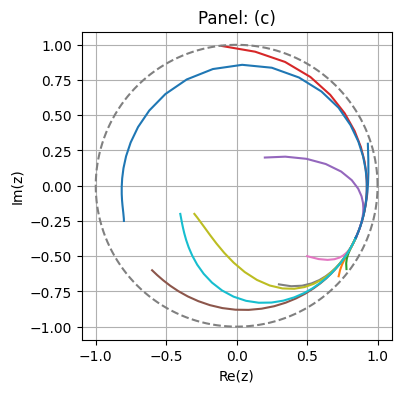

In [8]:
# Parameters
initial_values = [[4.5, 3, 1.4], [4.5, 0.65, 1.4], [10.0, 3.5, 1.4]]
letters = ["(a)", "(b)", "(c)"]
K = 4.5
F = 3
Omega = 1.4
Delta = 1.0
t_span = (0, 50)  # Time span for the simulation
t_eval = np.linspace(*t_span, 1000)  # Evaluation points
# Generate multiple initial conditions for z0
initial_conditions = [
    1 + 1j, 0.8 -1j, 1 -1j, -1 + 1j, 0.2 + 0.2j, -0.6 -0.6j, 0.5 - 0.5j, 0.3 - 0.7j, 
    -0.3 - 0.2j, -0.4 - 0.2j, -0.8 - 0.25j
]

# Plot trajectories for each initial condition
for count, arr in enumerate(initial_values):
    # Plot phase portrait
    plt.figure(figsize=(4, 4))
    K = arr[0]
    F = arr[1] 
    Omega = arr[2]
    for z0 in initial_conditions:
        sol = solve_reduced_dynamics(K, F, Delta, Omega, z0, t_span, t_eval)
        z = sol.y[0]
        # Filter to include only points within the unit circle
        mask = np.abs(z) <= 1  # Keep points where |z| <= 1
        z_filtered = z[mask]
        # Plot the filtered trajectory
        plt.plot(z_filtered.real, z_filtered.imag)
        #plt.plot(z.real, z.imag, color=np.random.rand(3,))

    # Plot unit circle for reference
    circle = np.linspace(0, 2 * np.pi, 500)
    plt.plot(np.cos(circle), np.sin(circle), '--', color="gray", label="|z| = 1 (Unit Circle)")

    # Labels and formatting
    plt.xlabel("Re(z)")
    plt.ylabel("Im(z)")
    plt.title(f"Panel: {letters[count]}")
    plt.axis("equal")
    plt.grid()
    plt.show()


# **Figure 2**

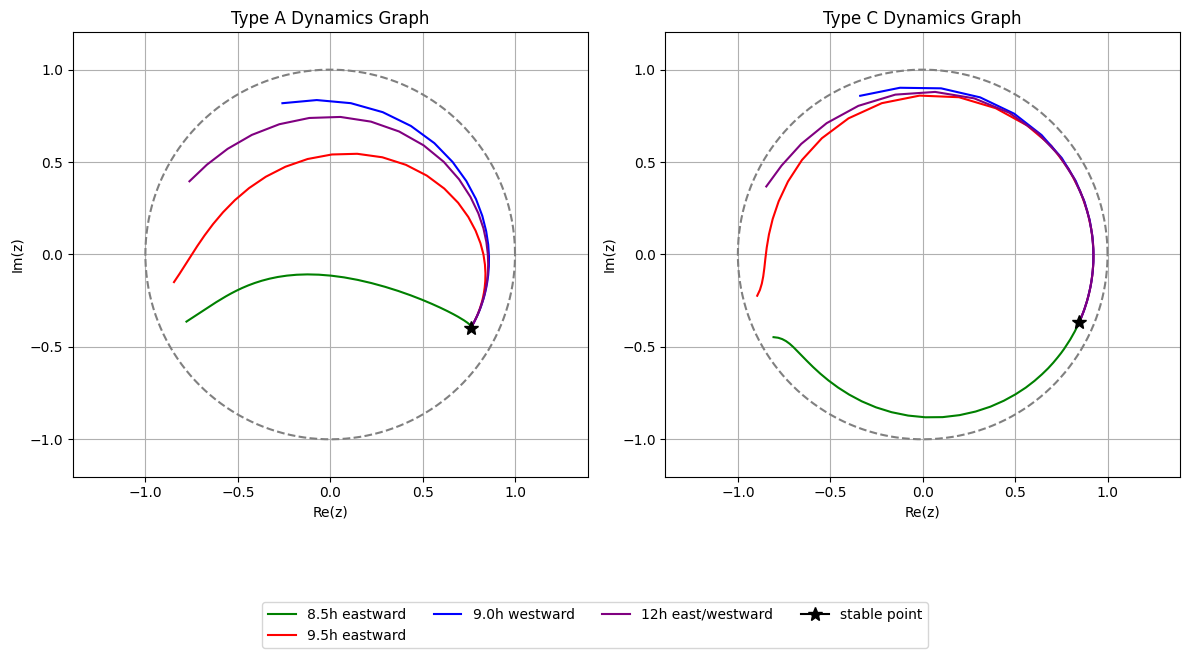

In [41]:
#Find Stable Points
initial_values = [[4.5, 3, 1.4], [10.0, 3.5, 1.4]]
new_letters = ["A", "C"]
Delta = 1.0
t_span = (0, 50)  # Time span for the simulation
t_eval = np.linspace(*t_span, 1000)  # Evaluation points
travel_points = [-8.5, -9.5, 9.0, 12.0]  # Travel points

# Initialize stable points
stable_points_real = []
stable_points_imag = []

# Compute stable points for each initial condition
for count, arr in enumerate(initial_values):
    K = arr[0]
    F = arr[1]
    Omega = arr[2]
    sol = solve_reduced_dynamics(K, F, Delta, Omega, -1-1j, t_span, t_eval)
    z = sol.y[0]
    # Filter to include only points within the unit circle
    mask = np.abs(z) <= 1  # Keep points where |z| <= 1
    z_filtered = z[mask]
    # Find stable point
    stable_points_real.append(z_filtered.real[-1])
    stable_points_imag.append(z_filtered.imag[-1])

# Create subplots for side-by-side graphs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
colors = ['green', 'red', 'blue', 'purple']  # Colors for each travel point
labels = ['8.5h eastward', '9.5h eastward', '9.0h westward', '12h east/westward']

for count, (arr, ax) in enumerate(zip(initial_values, axes)):
    K = arr[0]
    F = arr[1]
    Omega = arr[2]
    # Plot trajectories for each travel point
    for i, val in enumerate(travel_points):
        p_change = val * 2 * np.pi / 24
        z_st = stable_points_real[count] + 1j * stable_points_imag[count]
        z_0 = z_st * np.exp(1j * p_change)
        sol = solve_reduced_dynamics(K, F, Delta, Omega, z_0, t_span, t_eval)
        z = sol.y[0]
        # Filter to include only points within the unit circle
        mask = np.abs(z) <= 1  # Keep points where |z| <= 1
        z_filtered = z[mask]
        ax.plot(
            z_filtered.real, z_filtered.imag,
            color=colors[i], label=labels[i] if count == 0 else None
        )
    
    # Plot unit circle for reference
    circle = np.linspace(0, 2 * np.pi, 500)
    ax.plot(np.cos(circle), np.sin(circle), '--', color="gray")
    
    # Plot the stable point
    ax.plot(
        stable_points_real[count], stable_points_imag[count],
        marker='*', color='black', markersize=10,
        label='stable point' if count == 0 else None  # Label only in the first subplot
    )
    # Formatting
    ax.set_xlabel("Re(z)")
    ax.set_ylabel("Im(z)")
    ax.set_title(f"Type {new_letters[count]} Dynamics Graph")
    ax.axis("equal")
    ax.grid()

# Add combined legend below both subplots
fig.legend(
    loc='lower center', bbox_to_anchor=(0.5, -0.1),
    ncol=4, fontsize=10, frameon=True
)

# Adjust layout to fit everything nicely
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Leave space for the legend
plt.show()


# **Figure 3**

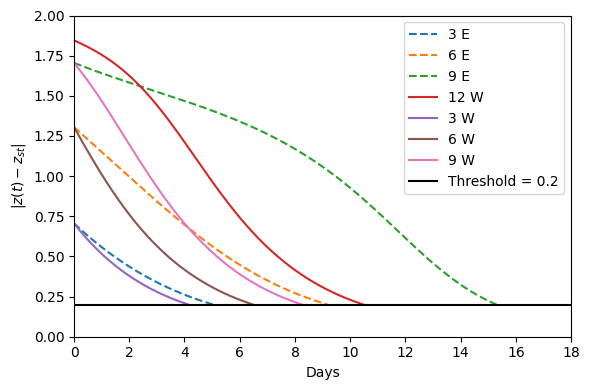

In [40]:
Delta = 3.8 * 10 ** -3
Omega = 1.4 * Delta
K = 4.5 * Delta
F = 3.5 * Delta
t_span = (0, 400)  # Time span for the simulation
t_eval = np.linspace(*t_span, 1000)  # Evaluation points
sol = solve_reduced_dynamics(K, F, Delta, Omega, -0.5-0.5j, t_span, t_eval)
z = sol.y[0]
# Filter to include only points within the unit circle
mask = np.abs(z) <= 1  # Keep points where |z| <= 1
z_filtered = z[mask]
# Find stable point
stable_point_real = z_filtered.real[-1]
stable_point_imag = z_filtered.imag[-1]
travel_points = [-3, -6, -9, 12, 3, 6, 9]

plt.figure(figsize=(6, 4))
for val in travel_points: 
    p_change = val * 2 * np.pi / 24
    z_st = stable_points_real[count] + 1j * stable_points_imag[count]
    z_0 = z_st * np.exp(1j * p_change)
    sol = solve_reduced_dynamics(K, F, Delta, Omega, z_0, t_span, t_eval)
    z = sol.y[0]
    t = sol.t
    #print(t)
    # Filter to include only points within the unit circle
    mask = np.abs(z) <= 1  # Keep points where |z| <= 1
    z_filtered = z[mask]
    t_filtered = t[mask]
    condition_mask = np.abs(z_filtered - z_st) > 0.2
    t_selected = t_filtered[condition_mask]
    z_selected = z_filtered[condition_mask]
    linestyle = "-" if val > 0 else "--"
    plt.plot(t_selected/24, np.abs(z_selected - z_st), linestyle=linestyle, label=f"{abs(val)} {'W' if val > 0 else 'E'}")
plt.axhline(y=0.2, color='black', linestyle='-', label='Threshold = 0.2')
plt.ylim(0, 2)
plt.xlim(0, 18)
plt.xlabel('Days')
plt.ylabel(r'$|z(t) - z_{st}|$')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

    


